# Import necessary packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=(10,10)

In [3]:
#Importing the data
data = pd.read_csv(r"C:\Users\Rajendra Pundi\Desktop\Hackathon\heart_disease_uci.csv")

In [4]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# DATA ANALYSIS

In [6]:
data.shape

(920, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
# Lets drop the unnecessary fileds like id and dataset
data.drop(['id','dataset'], axis=1, inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [10]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# VISUALIZATION

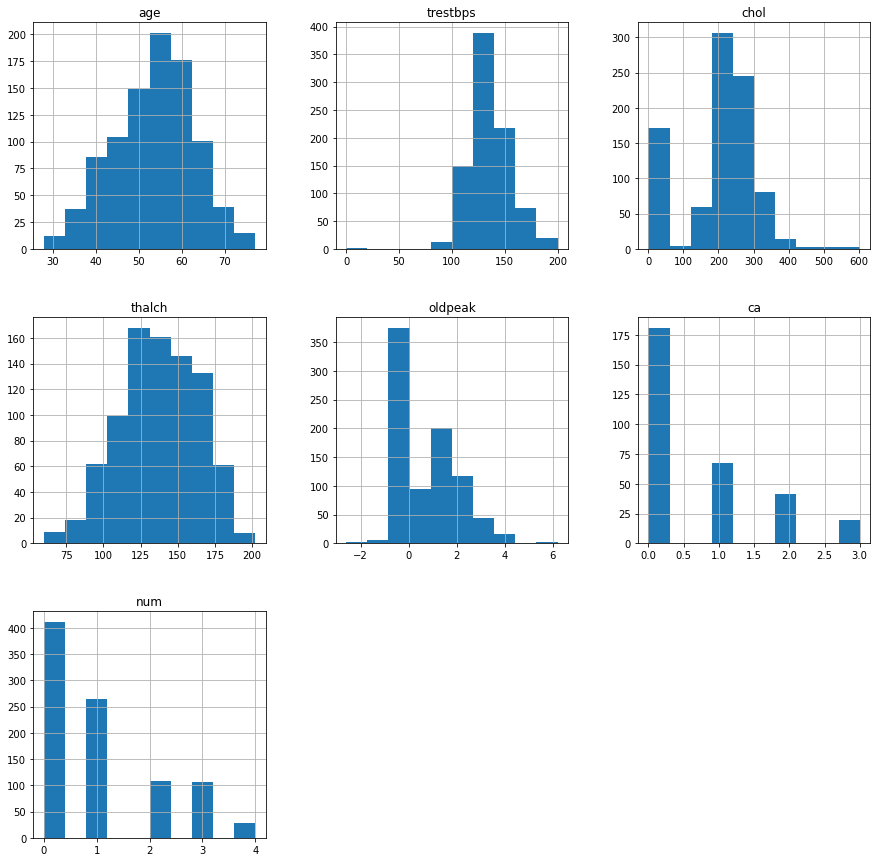

In [11]:
data.hist(figsize=(15,15))
plt.show()

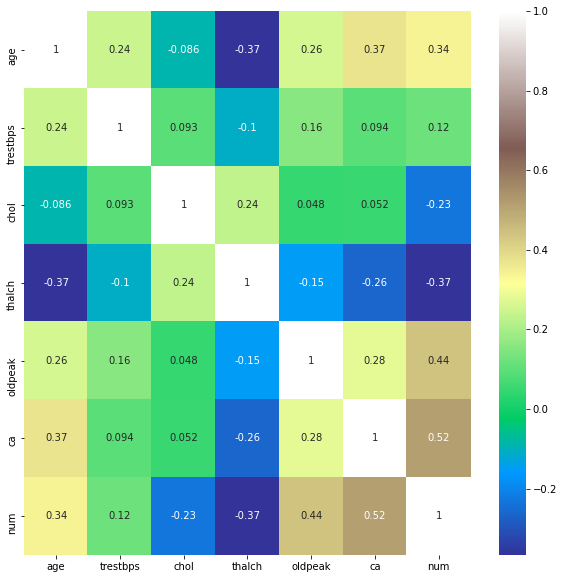

In [12]:
numeric_columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca','thal','num']
sns.heatmap(data[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Text(0.5, 1.0, 'Kde Plots for age, trestbps,chol,thalch and oldpeak')

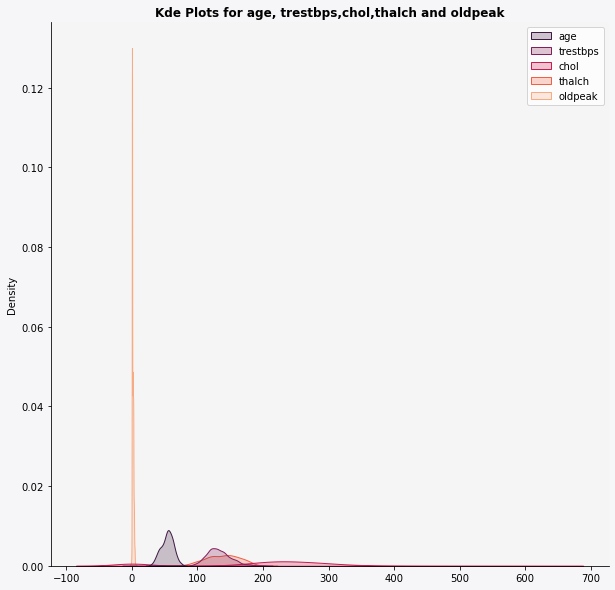

In [14]:
data_numerical =data[['age','trestbps','chol','thalch','oldpeak']]
fig, ax = plt.subplots(figsize = (10,10))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, trestbps,chol,thalch and oldpeak',weight='bold')

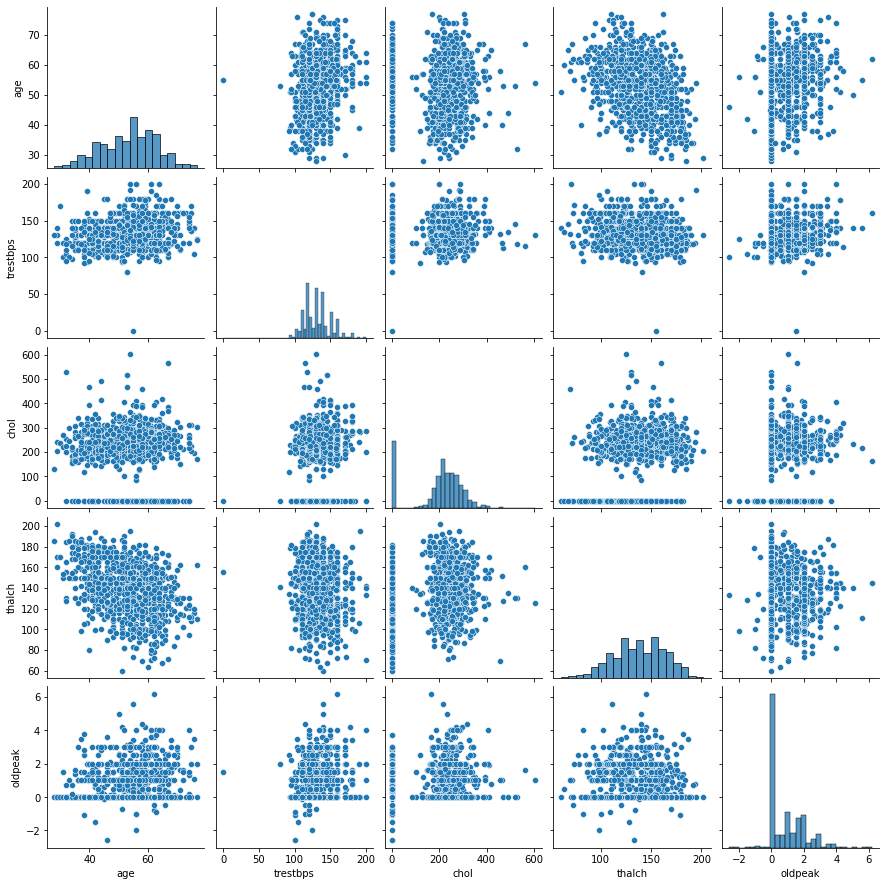

In [15]:
#Realtionship bw all the numerical values
sns.pairplot(data_numerical)

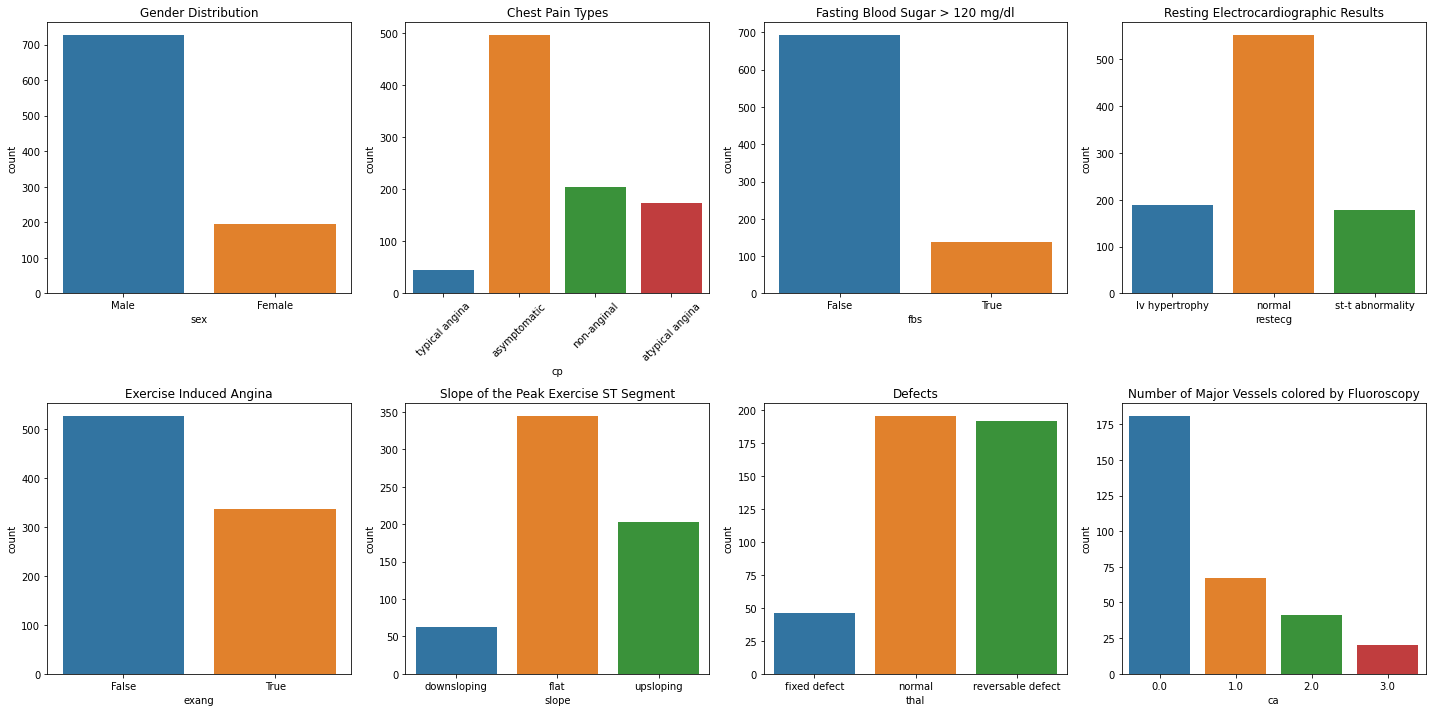

In [16]:
heart_cat = data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']]
fig, axes = plt.subplots(2, 4, figsize=(20,10))

sns.countplot(x='sex', data=heart_cat, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=heart_cat, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')

sns.countplot(x='fbs', data=heart_cat, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=heart_cat, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')

sns.countplot(x='exang', data=heart_cat, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

sns.countplot(x='slope', data=heart_cat, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(x='thal', data=heart_cat, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=heart_cat, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

In [17]:
corr = data.corr()
print(corr)

               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.244253 -0.086234 -0.365778  0.258243  0.370416  0.339596
trestbps  0.244253  1.000000  0.092853 -0.104899  0.161908  0.093705  0.122291
chol     -0.086234  0.092853  1.000000  0.236121  0.047734  0.051606 -0.231547
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.151174 -0.264094 -0.366265
oldpeak   0.258243  0.161908  0.047734 -0.151174  1.000000  0.281817  0.443084
ca        0.370416  0.093705  0.051606 -0.264094  0.281817  1.000000  0.516216
num       0.339596  0.122291 -0.231547 -0.366265  0.443084  0.516216  1.000000


In [18]:
#We will not remove ouliers as it leads to miscalculation of data.

# LETS FILL NULL VALUES

In [19]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [20]:
data['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [21]:
median_chol = data.loc[data['chol']!=0, 'chol'].median()
heart_df = data.fillna(value={'chol': median_chol})
heart_df.loc[heart_df['chol']==0, 'chol'] = median_chol 

In [22]:
mean_bp = heart_df.loc[heart_df['trestbps']!=0,'trestbps'].mean()
heart_df = heart_df.fillna(value={'trestbps': mean_bp})
heart_df.loc[heart_df['trestbps']==0, 'trestbps'] = mean_bp 

In [23]:
mean_hr = heart_df.loc[heart_df['thalch']!=0,'thalch'].mean()
heart_df = heart_df.fillna(value={'thalch': mean_hr})
heart_df.loc[heart_df['thalch']==0, 'thalch'] = mean_hr

In [24]:
mean_peak = heart_df.oldpeak.mean()
heart_df = heart_df.fillna(value={'oldpeak': mean_peak})
heart_df.loc[heart_df['oldpeak']==0, 'oldpeak'] = mean_peak

# Outlier Removation

<Figure size 6400x4800 with 0 Axes>

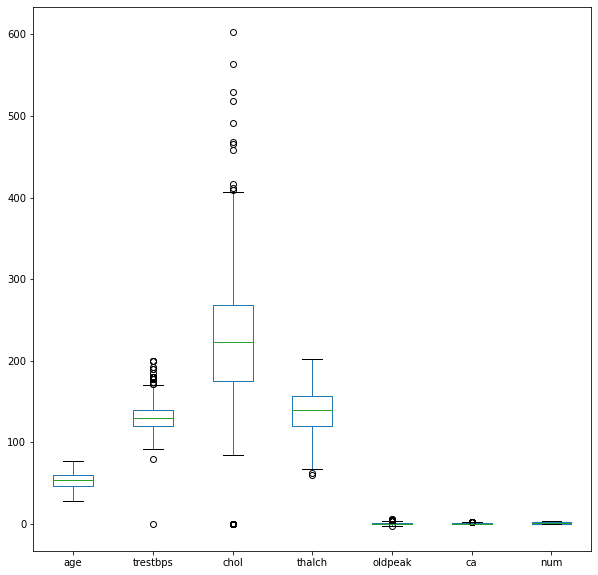

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show()

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


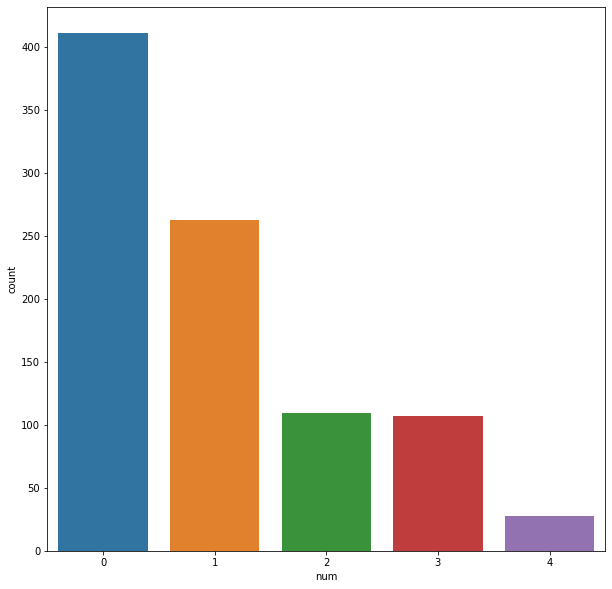

In [26]:
heart_df.drop(labels=['ca','thal','slope'], axis=1, inplace=True)
heart_df = heart_df.astype({'sex':'category', 'cp':'category', 'fbs':'bool', 'restecg':'category', 'exang':'bool'})

# Drop remaining rows with missing values and display distribution for target variables

heart_df.dropna(inplace=True)
sns.countplot('num', data=heart_df)
plt.show()

# SPLITTING THE DATA

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
heart_onehot = pd.get_dummies(heart_df, columns=['sex','cp', 'fbs', 'restecg', 'exang'])

X = heart_onehot.drop('num', axis=1)
y = heart_onehot.num


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)



In [30]:
y_train.value_counts()

0    291
1    180
3     80
2     72
4     19
Name: num, dtype: int64

In [31]:
heart_onehot.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       918 non-null    int64  
 1   trestbps                  918 non-null    float64
 2   chol                      918 non-null    float64
 3   thalch                    918 non-null    float64
 4   oldpeak                   918 non-null    float64
 5   num                       918 non-null    int64  
 6   sex_Female                918 non-null    uint8  
 7   sex_Male                  918 non-null    uint8  
 8   cp_asymptomatic           918 non-null    uint8  
 9   cp_atypical angina        918 non-null    uint8  
 10  cp_non-anginal            918 non-null    uint8  
 11  cp_typical angina         918 non-null    uint8  
 12  fbs_False                 918 non-null    uint8  
 13  fbs_True                  918 non-null    uint8  
 14  restecg_lv

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [34]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [35]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       120
           1       0.49      0.55      0.52        83
           2       0.28      0.19      0.23        37
           3       0.32      0.22      0.26        27
           4       1.00      0.11      0.20         9

    accuracy                           0.59       276
   macro avg       0.57      0.39      0.40       276
weighted avg       0.57      0.59      0.56       276



In [36]:
y_test

839    1
279    0
187    2
880    4
786    3
      ..
751    3
512    1
700    1
909    0
299    2
Name: num, Length: 276, dtype: int64

In [37]:
#test -> Ans returned by model
y_pred

array([1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0,
       0, 3, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 3, 0, 0, 3, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 3, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 4, 1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 2, 0, 0,
       1, 0, 1, 1, 0, 3, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 3, 1, 3, 1, 0, 0,
       0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 1, 0, 0, 1, 0, 1, 3,
       0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 3, 0,
       0, 3, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
ac_dt = accuracy_score(y_test,y_pred)
ac_dt

0.5869565217391305

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5869565217391305


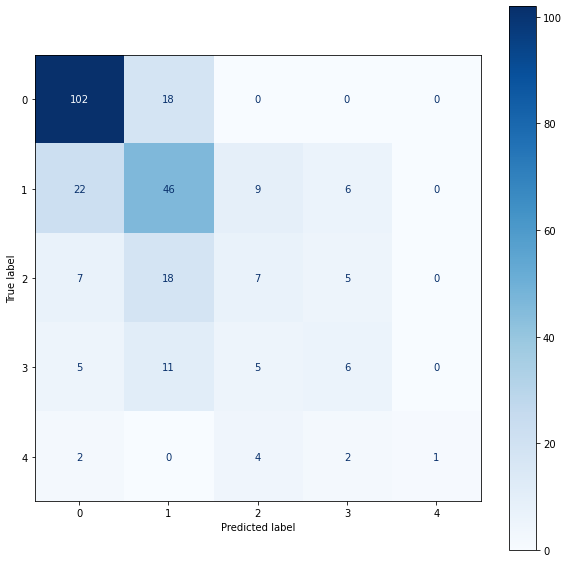

In [40]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf,X_test,y_test,cmap='Blues',values_format ='.3g')

# LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
Y_pred_lr = lr.predict(X_test)
Y_pred_lr

array([1, 0, 0, 3, 1, 0, 0, 0, 3, 0, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 3,
       0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 3, 3, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 3, 1, 0, 0, 3, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       3, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 3, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 3, 0, 3,
       0, 0, 1, 3, 0, 2, 0, 1, 0, 3, 3, 1, 1, 0, 0, 0, 2, 1, 3, 1, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 3, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 1, 3, 0,
       1, 3, 1, 1, 0, 3, 1, 3, 0, 1, 1, 2], dtype=int64)

In [44]:
y_test

839    1
279    0
187    2
880    4
786    3
      ..
751    3
512    1
700    1
909    0
299    2
Name: num, Length: 276, dtype: int64

In [45]:
y_pred = lr.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)
dic = {'Actual':actual,
       'Prediction':predcition
       }
df  = pd.DataFrame(dic)

In [46]:
print(accuracy_score(y_test,y_pred))

0.5978260869565217


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       120
           1       0.52      0.57      0.54        83
           2       0.25      0.11      0.15        37
           3       0.33      0.37      0.35        27
           4       0.00      0.00      0.00         9

    accuracy                           0.60       276
   macro avg       0.37      0.38      0.37       276
weighted avg       0.55      0.60      0.57       276



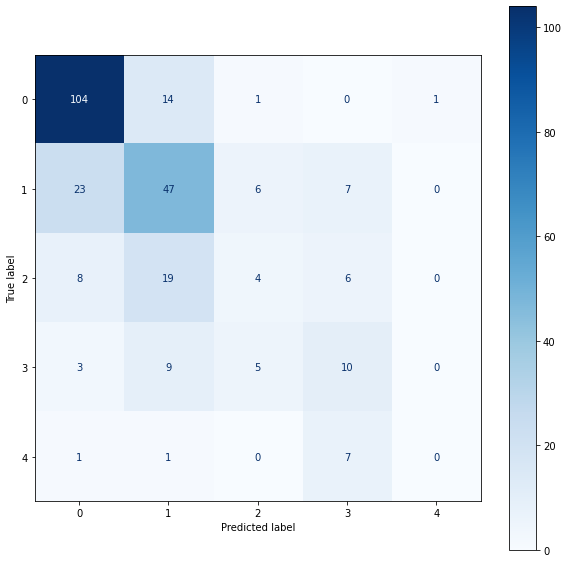

In [48]:
disp = plot_confusion_matrix(lr,X_test,y_test,cmap='Blues',values_format ='.3g')


# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
Y_pred =knn.predict(X_test)
Y_pred

array([2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 3, 1, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 3, 0, 1, 0, 2, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0,
       2, 1, 1, 1, 1, 0, 2, 3, 0, 1, 0, 1], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       120
           1       0.52      0.57      0.54        83
           2       0.25      0.11      0.15        37
           3       0.33      0.37      0.35        27
           4       0.00      0.00      0.00         9

    accuracy                           0.60       276
   macro avg       0.37      0.38      0.37       276
weighted avg       0.55      0.60      0.57       276



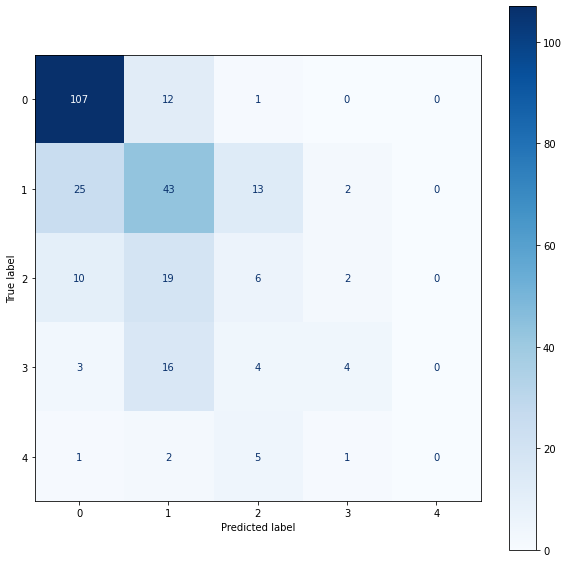

In [54]:
disp = plot_confusion_matrix(knn,X_test,y_test,cmap='Blues',values_format ='.3g')

# SVM

In [55]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.5905797101449275


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       120
           1       0.46      0.63      0.53        83
           2       0.25      0.08      0.12        37
           3       0.36      0.19      0.24        27
           4       0.00      0.00      0.00         9

    accuracy                           0.59       276
   macro avg       0.36      0.35      0.34       276
weighted avg       0.53      0.59      0.55       276



F:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


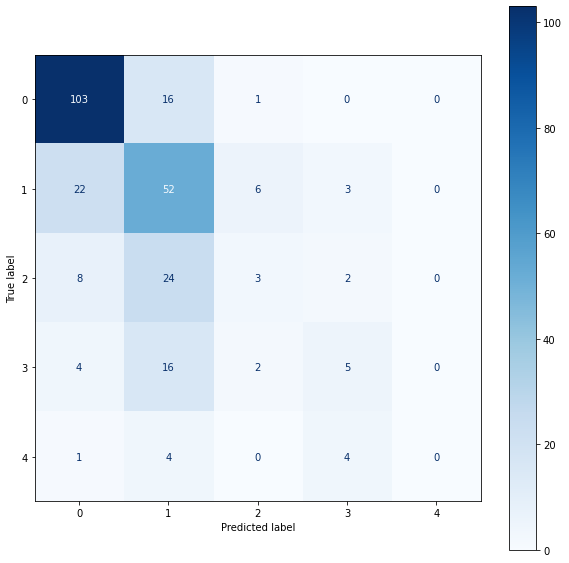

In [57]:
disp = plot_confusion_matrix(clf,X_test,y_test,cmap='Blues',values_format ='.3g')

# Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38405797101449274


In [59]:
y_pred

array([4, 2, 0, 2, 2, 4, 0, 0, 4, 0, 2, 2, 4, 2, 4, 4, 4, 2, 4, 0, 2, 4,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 4, 2, 0, 2, 2, 4, 4, 4, 0, 4, 2, 0, 0, 2, 2, 2, 4, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 4, 0,
       4, 2, 2, 0, 2, 2, 2, 0, 2, 4, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 4, 0, 4, 2, 2, 2, 0, 2,
       0, 0, 0, 4, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 4, 2,
       2, 2, 4, 4, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 4, 0, 4, 2, 2, 4, 2, 2,
       2, 0, 4, 2, 0, 2, 2, 2, 0, 4, 2, 4, 0, 2, 4, 2, 2, 2, 2, 4, 0, 4,
       4, 0, 2, 4, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 4, 2, 2, 4, 2, 0, 0,
       4, 4, 2, 2, 0, 2, 2, 4, 1, 2, 2, 2, 2, 4, 0, 2, 2, 2, 4, 0, 2, 2,
       0, 0, 4, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 2, 2, 0,
       2, 4, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [60]:
y_test

839    1
279    0
187    2
880    4
786    3
      ..
751    3
512    1
700    1
909    0
299    2
Name: num, Length: 276, dtype: int64

In [61]:
y_pred

array([4, 2, 0, 2, 2, 4, 0, 0, 4, 0, 2, 2, 4, 2, 4, 4, 4, 2, 4, 0, 2, 4,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 4, 2, 0, 2, 2, 4, 4, 4, 0, 4, 2, 0, 0, 2, 2, 2, 4, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 4, 0,
       4, 2, 2, 0, 2, 2, 2, 0, 2, 4, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 4, 0, 4, 2, 2, 2, 0, 2,
       0, 0, 0, 4, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 4, 2,
       2, 2, 4, 4, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 4, 0, 4, 2, 2, 4, 2, 2,
       2, 0, 4, 2, 0, 2, 2, 2, 0, 4, 2, 4, 0, 2, 4, 2, 2, 2, 2, 4, 0, 4,
       4, 0, 2, 4, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 4, 2, 2, 4, 2, 0, 0,
       4, 4, 2, 2, 0, 2, 2, 4, 1, 2, 2, 2, 2, 4, 0, 2, 2, 2, 4, 0, 2, 2,
       0, 0, 4, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 2, 2, 0,
       2, 4, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

array([[75,  0, 27,  0, 18],
       [ 6,  1, 61,  0, 15],
       [ 2,  1, 27,  0,  7],
       [ 0,  0, 21,  0,  6],
       [ 0,  0,  6,  0,  3]], dtype=int64)

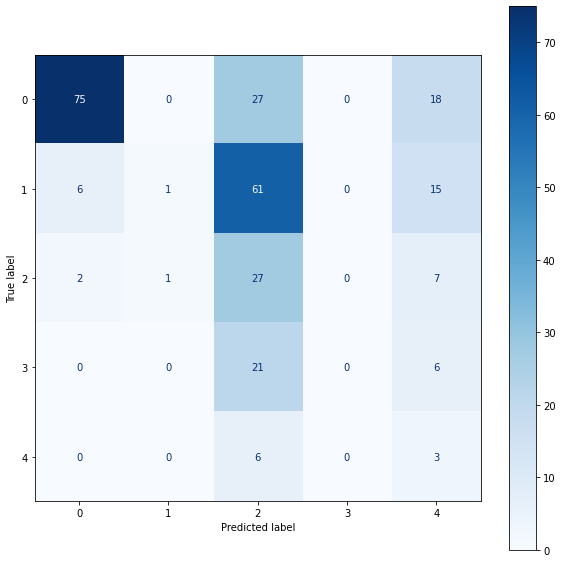

In [62]:
disp = plot_confusion_matrix(gnb,X_test,y_test,cmap='Blues',values_format ='.3g')
disp.confusion_matrix

In [63]:
ac = accuracy_score(y_test,y_pred)

In [64]:
ac

0.38405797101449274

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74       120
           1       0.50      0.01      0.02        83
           2       0.19      0.73      0.30        37
           3       0.00      0.00      0.00        27
           4       0.06      0.33      0.10         9

    accuracy                           0.38       276
   macro avg       0.33      0.34      0.23       276
weighted avg       0.57      0.38      0.37       276



F:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
